# Imports

#### Globals

In [1]:
import numpy as np
np.random.seed(1)

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [4]:
if not os.path.exists('results'):
    os.makedirs('results')

# Dummy Regression Using Mean Value

In [5]:
clf = DummyRegressor()
clf

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [6]:
train = pd.read_csv('../feature_engineering/train.gz')
X_train = train[train.columns[:-1]].values
y_train = train[train.columns[-1]].values

In [7]:
test = pd.read_csv('../feature_engineering/test.gz')
X_test = test[test.columns[:-1]].values
y_test = test[test.columns[-1]].values

## Training

In [8]:
clf.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [9]:
train_pred = clf.predict(X_train)

In [10]:
train_err = mean_squared_error(y_train, train_pred)
train_err

277.0505478892912

In [11]:
train_df = pd.DataFrame([y_train, clf.predict(X_train)], index=['Truth', 'Predictions']).T

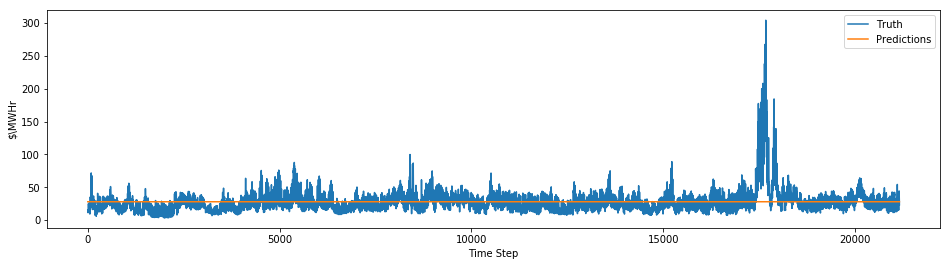

In [12]:
ax = train_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/dummy-train.pdf')
plt.savefig('results/dummy-train.svg')

## Testing

In [13]:
test_pred = clf.predict(X_test)

In [14]:
test_err = mean_squared_error(y_test, test_pred)
test_err

182.13474209210713

In [15]:
test_df = pd.DataFrame([y_test, clf.predict(X_test)], index=['Truth', 'Predictions']).T

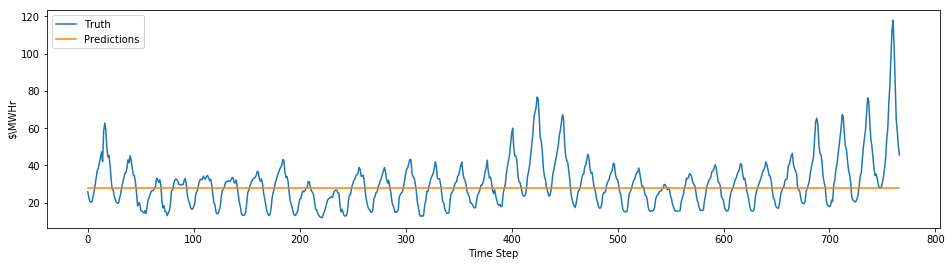

In [16]:
ax = test_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/dummy-test.pdf')
plt.savefig('results/dummy-test.svg')

## Results

In [17]:
results = pd.Series([train_err, test_err], index=['Train', 'Test'])
results

Train    277.050548
Test     182.134742
dtype: float64

In [18]:
results.to_csv('results/dummy-mse.csv')